In [1]:
import pandas as pd

dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv')
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv')

In [2]:
x_train = dataset_train.drop('y', axis=1)
y_train = dataset_train['y']

x_test = dataset_test.drop('y', axis=1)
y_test = dataset_test['y']

In [3]:
print(len(x_train)/(len(x_train) + len(x_test))) # % de treino
print(len(x_test)/(len(x_train) + len(x_test))) # % de teste

0.8729777911064461
0.12702220889355392


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

init = time.time()

neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
cv = cross_val_score(neigh,x_test, y_test,scoring='r2')
neigh_score = neigh.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(neigh_score))
print(cv)
print('MAE: {}'.format(mae))

Execution time: 13.607582807540894 seconds
R2 score: 0.40382368912881295
[ 0.38752104  0.36791456  0.33863202]
MAE: 0.4778244285265414


In [5]:
import numpy as np

k = 10  # 10-fold
scores = cross_val_score(neigh,x_test, y_test,cv= k)
print(scores)
hite_rate = np.mean(scores) 
print("Mean : " + str(hite_rate))

[ 0.48041259  0.40268934  0.50986638  0.36480421  0.40669415  0.33359181
  0.42136947  0.3826659   0.32216239  0.36090855]
Mean : 0.39851647967


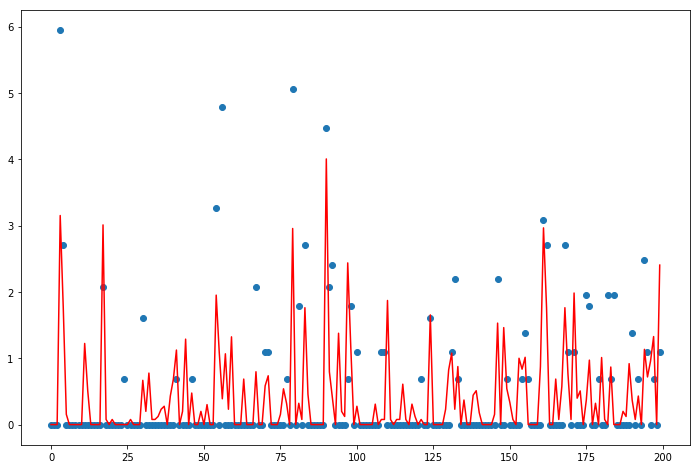

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()